Шанаровой Надежды, 451 группа


Вариант 13

$-(\frac{u'}{2x+3})' + (1 + cos(x))u = 1 + x$

$u(-1) = u'(1) = 0$

In [ ]:
import numpy as np
import scipy.special as scs
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

метод Ритца с системой

$1 + x, i = 1$

$(1 - x^2)P_{i-2}^{(1,1)}(x), i = 2,..$

In [ ]:
def w(i,x):
  if i == 1:
    return 1 + x
  return (1 - x*x)*scs.eval_jacobi(i-2,1,1,x)

In [ ]:
def dw(i,x):
  if i == 1:
    return 1
  return -2*(i - 1)*scs.eval_jacobi(i-1,0,0,x)

In [ ]:
# i -> w_i
def fabric_w(i):
  def subs(x):
    return w(i,x)
  return subs

# i -> dw_i
def fabric_dw(i):
  def subs(x):
    return dw(i,x)
  return subs

In [ ]:
def scalar_mult(f1,f2):
  def f(x):
    return f1(x)*f2(x)
  return quad(f,-1,1)[0]

In [ ]:
def p(x):
  return 1/(2*x + 3)
def r(x):
  return 1 + np.cos(x)
def f(x):
  return 1 + x
def integrand(x, i, j):
  return p(x)*dw(i,x)*dw(j,x) + r(x)*w(i,x)*w(j,x)

In [ ]:
def solve_ritz(n):
  a = [[quad(integrand, -1, 1, args=(i,j))[0] for j in range(1,n+1)] for i in range(1,n+1)]
  b = []
  for i in range(1,n+1):
    b.append(scalar_mult(fabric_w(i),f))
  a = np.array(a)
  b = np.array(b)
  #print(a.shape, b.shape)
  c = np.linalg.solve(a,b)
  def u(x):
    return sum([c[i-1]*w(i,x) for i in range(1,n+1)])
  return u

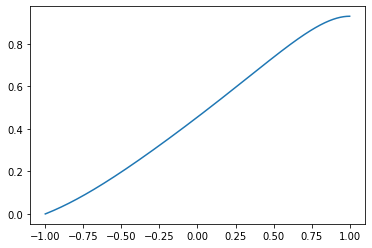

In [ ]:
n = 20
x = np.linspace(1,-1,1000)
u = solve_ritz(n)
y = [u(t) for t in x]
plt.plot(x,y)

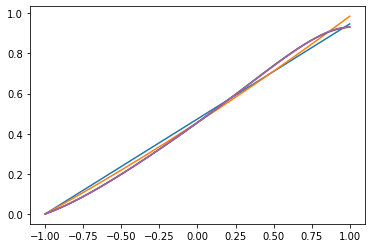

,x=-0.5,x=-0,x=0.5
1,0.236717,0.473435,0.710152
2,0.218827,0.455987,0.711479
5,0.198705,0.454380,0.739978
10,0.197569,0.456056,0.737909
20,0.197569,0.456056,0.737909


In [ ]:
df = pd.DataFrame(columns=['x=-0.5','x=-0','x=0.5'])
x = np.linspace(1,-1,1000)
for n in [1,2,5,10,20]:
  u = solve_ritz(n)
  df.loc[n] = [u(-0.5),u(0),u(0.5)]
  y = [u(t) for t in x]
  plt.plot(x,y)
plt.show()
df

метод коллокации

$w_i(x) = 2 + 2x + (1-x^2)x^i$

узлы коллокации $t_i = cos(\frac{(2i - 1)\pi}{2n})$



In [ ]:
def w1(j,x):
  return 2 + 2*x + (1 - x*x)*(x**j)
def dw1(j,x):
  return 2 - 2*x**(j+1) + j*(1 - x*x)*x**(j - 1)
def ddw1(j,x):
  return -2*(j + 1)*x**j + j*(j - 1)*(1 - x**2)*x**(j - 2) - 2*j*x**j

In [ ]:
def dp(x):
  return -2/(2*x+3)**2

In [ ]:
def solve_colloc(n):
  a = [[0 for i in range(0,n+1)] for j in range(0,n+1)]
  b = []
  for i in range(1,n+1):
    t = np.cos((2*i-1)*np.pi/(2*n))
    b.append(f(t))
    for j in range(1,n+1):
      a[i][j] = -dp(t)*dw1(j,t) - p(t)*ddw1(j,t) + r(t)*w1(j,t)
  a = np.array(a)
  a = a[:,1:n+1]
  a = a[1:n+1,:]
  b = np.array(b)
  c = np.linalg.solve(a,b)
  def u(x):
    return sum([c[i-1]*w1(i,x) for i in range(1,n+1)])
  return u

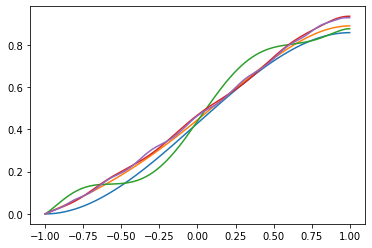

,x=-0.5,x=-0,x=0.5
1,0.133929,0.428571,0.723214
2,0.183823,0.444530,0.735175
5,0.143727,0.437874,0.787124
10,0.201347,0.467366,0.741335
20,0.194263,0.464021,0.733757


In [ ]:
df = pd.DataFrame(columns=['x=-0.5','x=-0','x=0.5'])
x = np.linspace(1,-1,1000)
for n in [1,2,5,10,20]:
  u = solve_colloc(n)
  df.loc[n] = [u(-0.5),u(0),u(0.5)]
  y = [u(t) for t in x]
  plt.plot(x,y)
plt.show()
df